# Overview :
## 1. Importing dependencies and loading Data set
## 2. Exploratory Analysis
## 3. Data Cleaning
## 4. Train Test Split
## 5. Training the Model
## 6. Testing the model accuracy

##  Material
https://medium.com/@gouravbais08/ad-click-prediction-9478a9ecf066
## Datasets
https://drive.google.com/drive/folders/1Gv0jtk73SVfXBEhjV4sX9WU_hP_w5vA3

# Step 1 : Importing Dependencies and Loading Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/k.fukada/.local/share/virtualenvs/data_science-tXjswaqR/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
amex = pd.read_csv('./data/Ad_click_prediction_train.csv')
amex.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


### Data research
* session_id：セッションID
* DateTime：セッション時間
* user_id：ユーザーID
* product：商品ID
* campaign_id：キャンペーンID
* webpage_id：webpageID
* product_category_1：商品カテゴリ1
* product_category_2：商品カテゴリ2
* user_group_id：ユーザーグループID
* gender：性別
* age_level：年代
* user_depth：？
* city_development_index：地域
* var_1：ダミー変数
* is_click：クリック

In [3]:
amex.tail()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
463286,583588,2017-07-07 23:59,572718,H,118601,28529,5,82527.0,4.0,Male,4.0,3.0,2.0,0,0
463287,198389,2017-07-07 23:59,130461,I,118601,28529,4,82527.0,10.0,Female,4.0,3.0,2.0,1,0
463288,563423,2017-07-07 23:59,306241,D,118601,28529,4,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463289,595571,2017-07-07 23:59,306241,D,118601,28529,5,82527.0,2.0,Male,2.0,3.0,NaN,0,0
463290,45023,2017-07-07 23:59,1113780,C,405490,60305,3,NaN,5.0,Male,5.0,3.0,4.0,0,0


In [4]:
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

# Step 2 : Exploratory Analysis

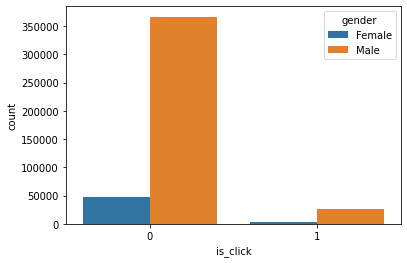

In [5]:
sns.countplot(amex['is_click'], hue=amex['gender'])

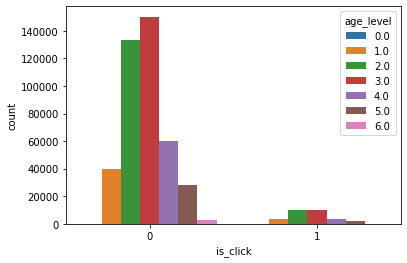

In [6]:
sns.countplot(amex['is_click'], hue=amex['age_level'])

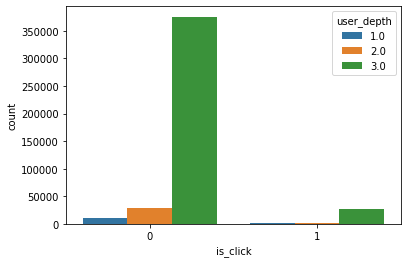

In [7]:
sns.countplot(amex['is_click'], hue=amex['user_depth'])

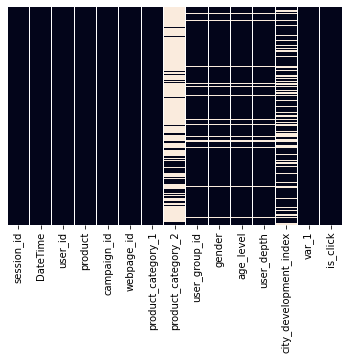

In [8]:
sns.heatmap(amex.isna(), yticklabels=False, cbar=False)

In [9]:
amex.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

# Step 3 : Data Cleaning

In [10]:
amex.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,product_category_2,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,NaN,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,NaN,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,NaN,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,NaN,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,NaN,2.0,Male,2.0,3.0,2.0,1,0


In [11]:
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   DateTime                463291 non-null  object 
 2   user_id                 463291 non-null  int64  
 3   product                 463291 non-null  object 
 4   campaign_id             463291 non-null  int64  
 5   webpage_id              463291 non-null  int64  
 6   product_category_1      463291 non-null  int64  
 7   product_category_2      97437 non-null   float64
 8   user_group_id           445048 non-null  float64
 9   gender                  445048 non-null  object 
 10  age_level               445048 non-null  float64
 11  user_depth              445048 non-null  float64
 12  city_development_index  338162 non-null  float64
 13  var_1                   463291 non-null  int64  
 14  is_click            

In [12]:
amex.isnull().sum()

session_id                     0
DateTime                       0
user_id                        0
product                        0
campaign_id                    0
webpage_id                     0
product_category_1             0
product_category_2        365854
user_group_id              18243
gender                     18243
age_level                  18243
user_depth                 18243
city_development_index    125129
var_1                          0
is_click                       0
dtype: int64

In [13]:
amex = amex.drop('product_category_2', axis=1)

In [14]:
amex.head()

,session_id,DateTime,user_id,product,campaign_id,webpage_id,product_category_1,user_group_id,gender,age_level,user_depth,city_development_index,var_1,is_click
0,140690,2017-07-02 00:00,858557,C,359520,13787,4,10.0,Female,4.0,3.0,3.0,0,0
1,333291,2017-07-02 00:00,243253,C,105960,11085,5,8.0,Female,2.0,2.0,NaN,0,0
2,129781,2017-07-02 00:00,243253,C,359520,13787,4,8.0,Female,2.0,2.0,NaN,0,0
3,464848,2017-07-02 00:00,1097446,I,359520,13787,3,3.0,Male,3.0,3.0,2.0,1,0
4,90569,2017-07-02 00:01,663656,C,405490,60305,3,2.0,Male,2.0,3.0,2.0,1,0


In [15]:
def gender(col):
    pro1 = col[0]
    gender = col[1]

    if pd.isnull(gender):
        if(pro1 <= 3):
            return('Male')
        else:
            return('Female')
    else:
        return(gender)

def userGroupId(col):
    gender = col[0]
    user = col[1]

    if pd.isnull(user):
        if(gender == 'Female'):
            return(8)
        else:
            return(3)
    else:
        return(user)

#gender
amex['gender'] = amex[['product_category_1','gender']].apply(gender,axis = 1)

#userID
amex['user_group_id'] = amex[['gender','user_group_id']].apply(userGroupId,axis = 1)
amex['age_level'].fillna(3,inplace = True)
amex['user_depth'].fillna(3,inplace = True)
amex['city_development_index'].fillna(3,inplace = True)

amex['Time'] = amex['DateTime'].apply(lambda x : x.split(' ')[1])
amex['Date'] = amex['DateTime'].apply(lambda x : x.split(' ')[0])
amex.drop(['DateTime'],inplace=True,axis=1)

amex['Year'] = amex['Date'].apply( lambda x : x.split('-')[0] )
amex['Month'] = amex['Date'].apply( lambda x : x.split('-')[1] )
amex['Date'] = amex['Date'].apply( lambda x : x.split('-')[2] )

amex['Hour'] = amex['Time'].apply( lambda x : x.split(':')[0] )
amex['Minutes'] = amex['Time'].apply( lambda x : x.split(':')[1] )

amex.drop(['Date'],axis = 1,inplace=True)
amex.drop(['Time'],axis = 1,inplace=True)

gender = pd.get_dummies(amex['gender'],drop_first=True)
product_type = pd.get_dummies(amex['product'])

amex.drop(['gender'],axis = 1,inplace=True)
amex.drop(['product'],axis = 1,inplace = True)
amex['gender'] = gender 

amex = pd.concat([amex,product_type],axis=1)

In [16]:
pd.set_option('display.max_columns', 50)

In [17]:
amex.head()

,session_id,user_id,campaign_id,webpage_id,product_category_1,user_group_id,age_level,user_depth,city_development_index,var_1,is_click,Year,Month,Hour,Minutes,gender,A,B,C,D,E,F,G,H,I,J
0,140690,858557,359520,13787,4,10.0,4.0,3.0,3.0,0,0,2017,07,00,00,0,0,0,1,0,0,0,0,0,0,0
1,333291,243253,105960,11085,5,8.0,2.0,2.0,3.0,0,0,2017,07,00,00,0,0,0,1,0,0,0,0,0,0,0
2,129781,243253,359520,13787,4,8.0,2.0,2.0,3.0,0,0,2017,07,00,00,0,0,0,1,0,0,0,0,0,0,0
3,464848,1097446,359520,13787,3,3.0,3.0,3.0,2.0,1,0,2017,07,00,00,1,0,0,0,0,0,0,0,0,1,0
4,90569,663656,405490,60305,3,2.0,2.0,3.0,2.0,1,0,2017,07,00,01,1,0,0,1,0,0,0,0,0,0,0


In [18]:
amex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463291 entries, 0 to 463290
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   session_id              463291 non-null  int64  
 1   user_id                 463291 non-null  int64  
 2   campaign_id             463291 non-null  int64  
 3   webpage_id              463291 non-null  int64  
 4   product_category_1      463291 non-null  int64  
 5   user_group_id           463291 non-null  float64
 6   age_level               463291 non-null  float64
 7   user_depth              463291 non-null  float64
 8   city_development_index  463291 non-null  float64
 9   var_1                   463291 non-null  int64  
 10  is_click                463291 non-null  int64  
 11  Year                    463291 non-null  object 
 12  Month                   463291 non-null  object 
 13  Hour                    463291 non-null  object 
 14  Minutes             

# Step 4 : Train Test Split 

In [19]:
y = amex['is_click']
x = amex.drop(['is_click'], axis=1)

from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(x,y,test_size = 0.6, random_state = 2)

# Step 5 : Training the Machine Learning Model

## Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


# Step 6 : Model Evaluation

## Check Accuracy

In [22]:
from sklearn.metrics import accuracy_score

print('\n Accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))


 Accuracy =  0.9324939293101898


## 93％という精度で予測することができるモデルを構築することができた！！
## でも、モデルは実際にどのようにマーケティング活動に活かすことができる？？

## Check the each input influence

### 予測に聞いてきている変数は何か考えましょう！

# Step 7 : Statistic Analytics

In [43]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

自由に説明変数を設定していきましょう！

In [44]:
## Modeling 
mod_glm = smf.glm(formula = "is_click ~ Year + Month + gender + age_level + user_depth + city_development_index", data = amex, family = sm.families.Binomial()).fit()

In [45]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_click   No. Observations:               463291
Model:                            GLM   Df Residuals:                   463286
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1462e+05
Date:                Sat, 16 May 2020   Deviance:                   2.2923e+05
Time:                        13:45:47   Pearson chi2:                 4.63e+05
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -2.4781      0.055    -44.657      0.000      -2.587      -2.369
gender                     0.0469      0.019      2.510      0.012       0.010       0.084
age_level                 -0.0327      0.006     -5.666      0.000      -0.044      -0.021
user_depth                -0.0120      0.015     -0.807      0.420      -0.041       0.017
city_development_index    -0.0230      0.007     -3.161      0.002      -0.037      -0.009
==========================================================================================
"""

対数オッズ比→オッズ比にして、パラメータを解釈

In [46]:
import scipy as sp
param_exp = sp.exp(mod_glm.params)

<ipython-input-46-bcb513f27531>:2: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  param_exp = sp.exp(mod_glm.params)


In [47]:
param_exp = pd.DataFrame(param_exp, columns = {'exp'})
param_exp.sort_values('exp', ascending=False)

,exp
Intercept,0.083904
gender,1.048007
age_level,0.967806
user_depth,0.988033
city_development_index,0.977276
